In [1]:
import pandas as pd
data=pd.read_excel("lab3_data.xlsx")
df=pd.DataFrame(data)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [2]:
import pandas as pd
import math

def entropy(column):
    class_counts = column.value_counts()
    total = len(column)
    entropy = 0
    for count in class_counts:
        p=count/total
        entropy=p * math.log2(p)*-1
    return entropy

e1=entropy(df['age'])
print("entropy of age: ",e1)
e2=entropy(df['income'])
print("entropy of income: ",e2)
e3=entropy(df['student'])
print("entropy of student: ",e3)
e4=entropy(df['credit_rating'])
print("entropy of creit_rating: ",e4)

entropy of age:  0.5163871205878868
entropy of income:  0.5163871205878868
entropy of student:  0.5
entropy of creit_rating:  0.5238824662870492


In [3]:
total_entropy = entropy(df['buys_computer'])
print("Total entropy(H): ",total_entropy)

Total entropy(H):  0.5305095811322292


In [14]:
column=['age','income','student','credit_rating']
def ig(col):
    x=entropy(df[col])
    ig=total_entropy-x
    return ig
infog=[]
for i in column:
    a=ig(i)
    infog.append(a)
    print("the information gear of",i,"is",a)
maximum=max(infog)
max_index=infog.index(maximum)
print("the root node will be ",max_index)

the information gear of age is 0.014122460544342408
the information gear of income is 0.014122460544342408
the information gear of student is 0.030509581132229235
the information gear of credit_rating is 0.006627114845180082
the root node will be  2


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
df_encoded

,age,income,student,credit_rating,buys_computer
0,1,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,1
3,2,2,0,1,1
4,2,1,1,1,1
5,2,1,1,0,0
6,0,1,1,0,1
7,1,2,0,1,0
8,1,1,1,1,1
9,2,2,1,1,1


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df_encoded.drop('buys_computer', axis=1)
y = df_encoded['buys_computer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model=DecisionTreeClassifier()
model=model.fit(X_train, y_train)

train_score=model.score(X_train, y_train)
print("the training set accuracy for the model is ",train_score)
depth=model.get_depth()
print("the depth of the decision tree: ",depth)

the training set accuracy for the model is  1.0
the depth of the decision tree:  4


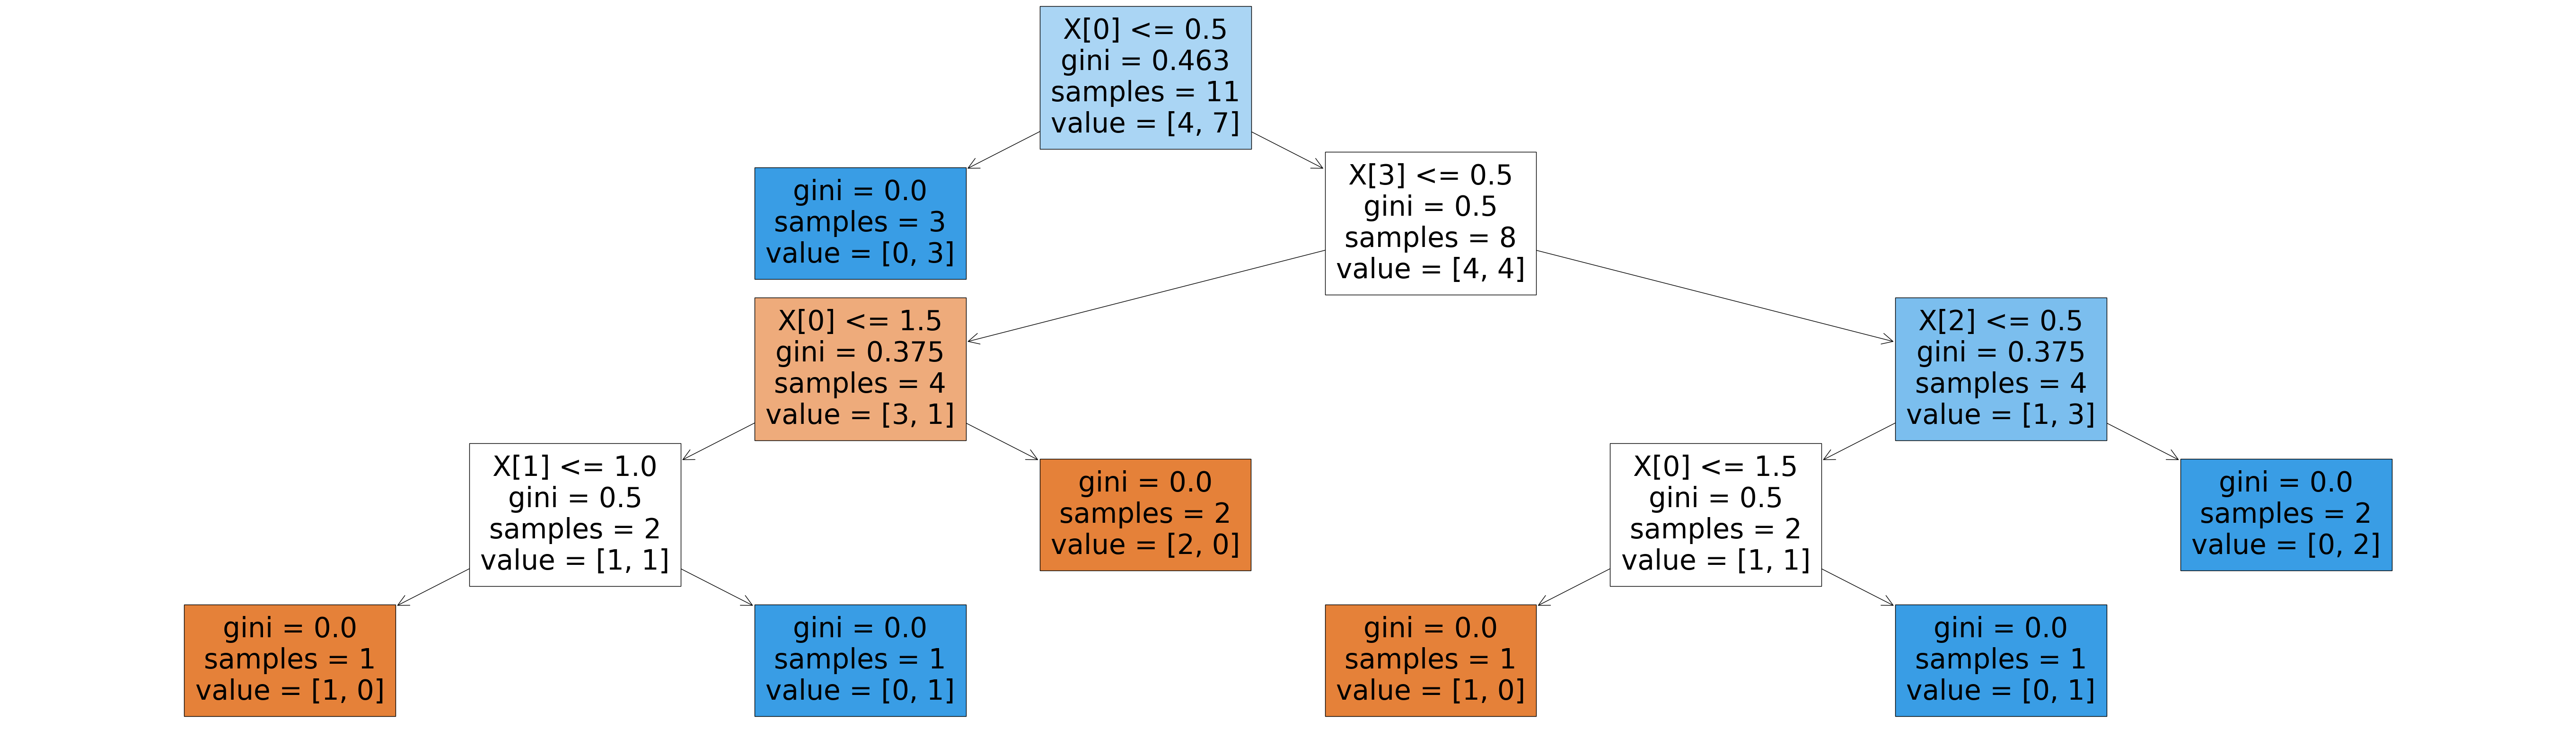

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(70,20))
plot_tree(model,filled=True)
plt.show()

In [26]:
import pandas as pd
import numpy as np
missing_values = ["n/a", "na", "--","?"]
df1 = pd.read_excel("embeddingsdata.xlsx",na_values = missing_values)
df1

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,2
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,0
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,2
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,5


Test Accuracy: 0.4111111111111111
Train Accuracy: 0.9968253968253968


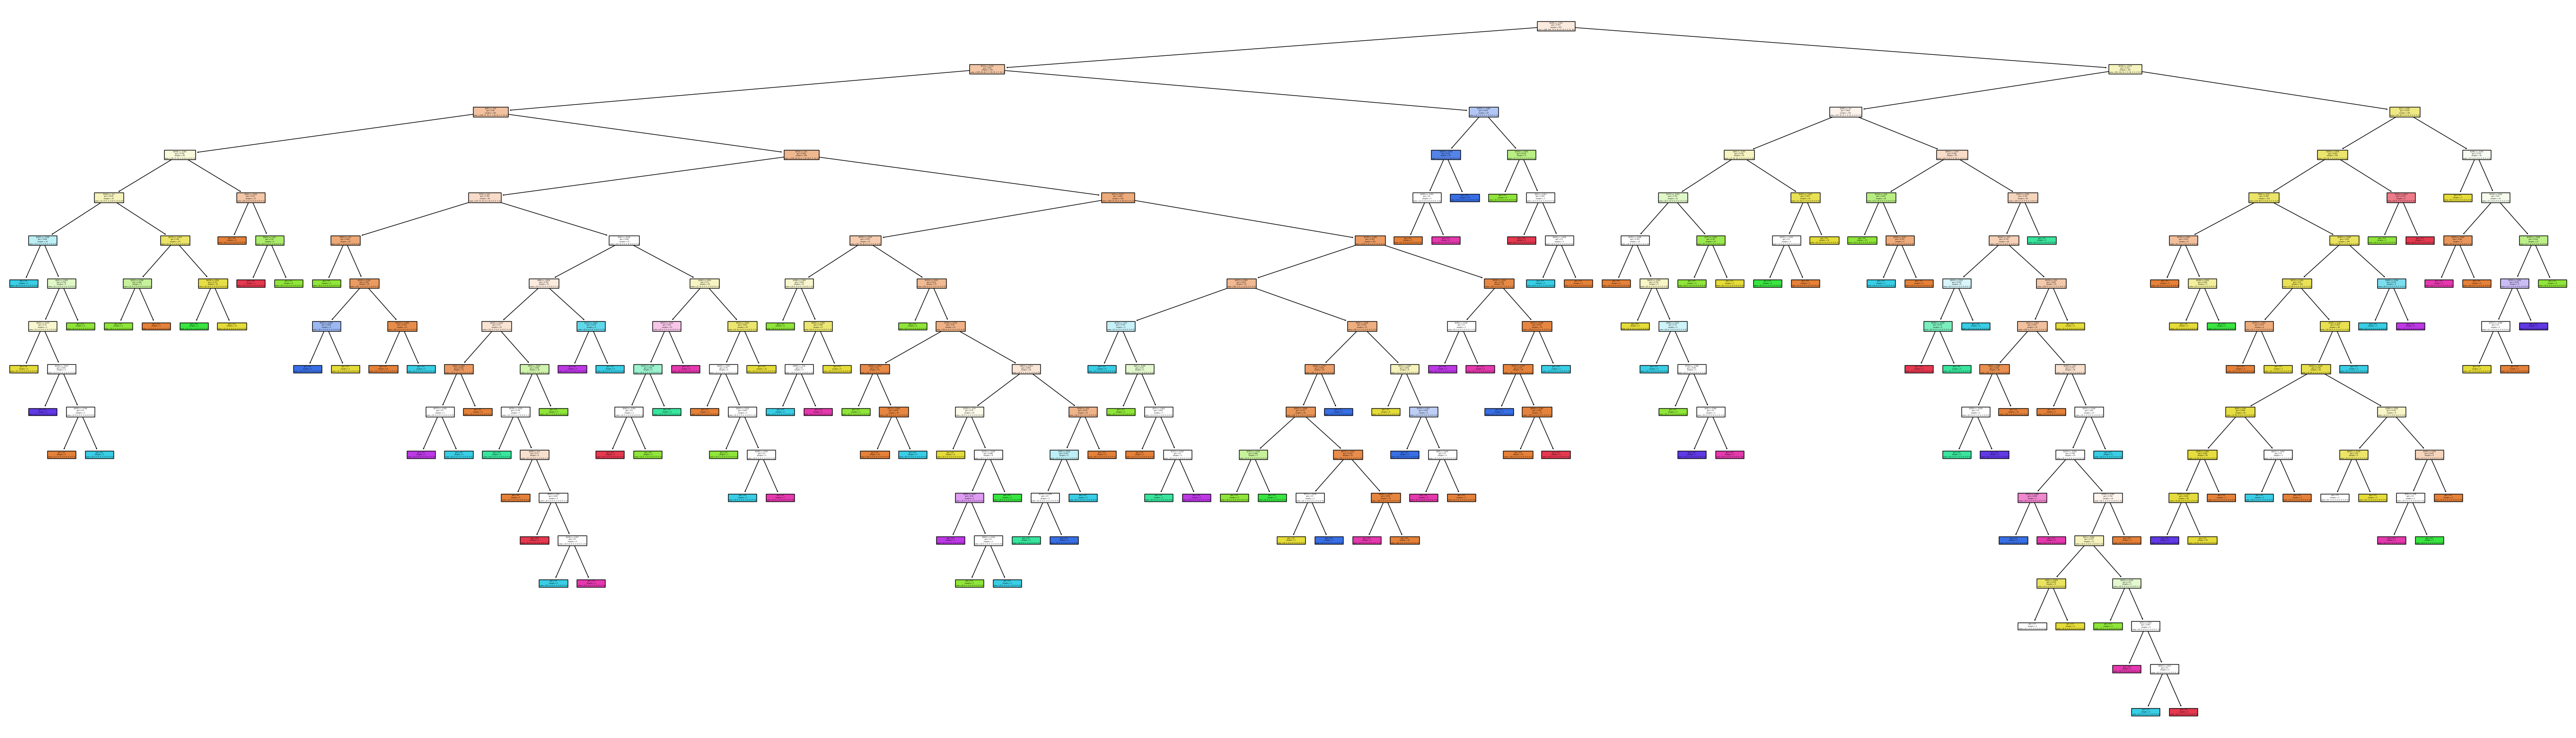

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X = df1.drop('Label', axis=1) 
y = df1['Label']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model1=DecisionTreeClassifier()
model1=model1.fit(X_train, y_train)

test_pred = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, test_pred)
print("Test Accuracy:", accuracy1)

train_pred = model1.predict(X_train)
accuracy2 = accuracy_score(y_train, train_pred)
print("Train Accuracy:", accuracy2)

plt.figure(figsize=(70,20))
plot_tree(model1,filled=True)
plt.show()

Test Accuracy: 0.45925925925925926
Train Accuracy: 0.7142857142857143


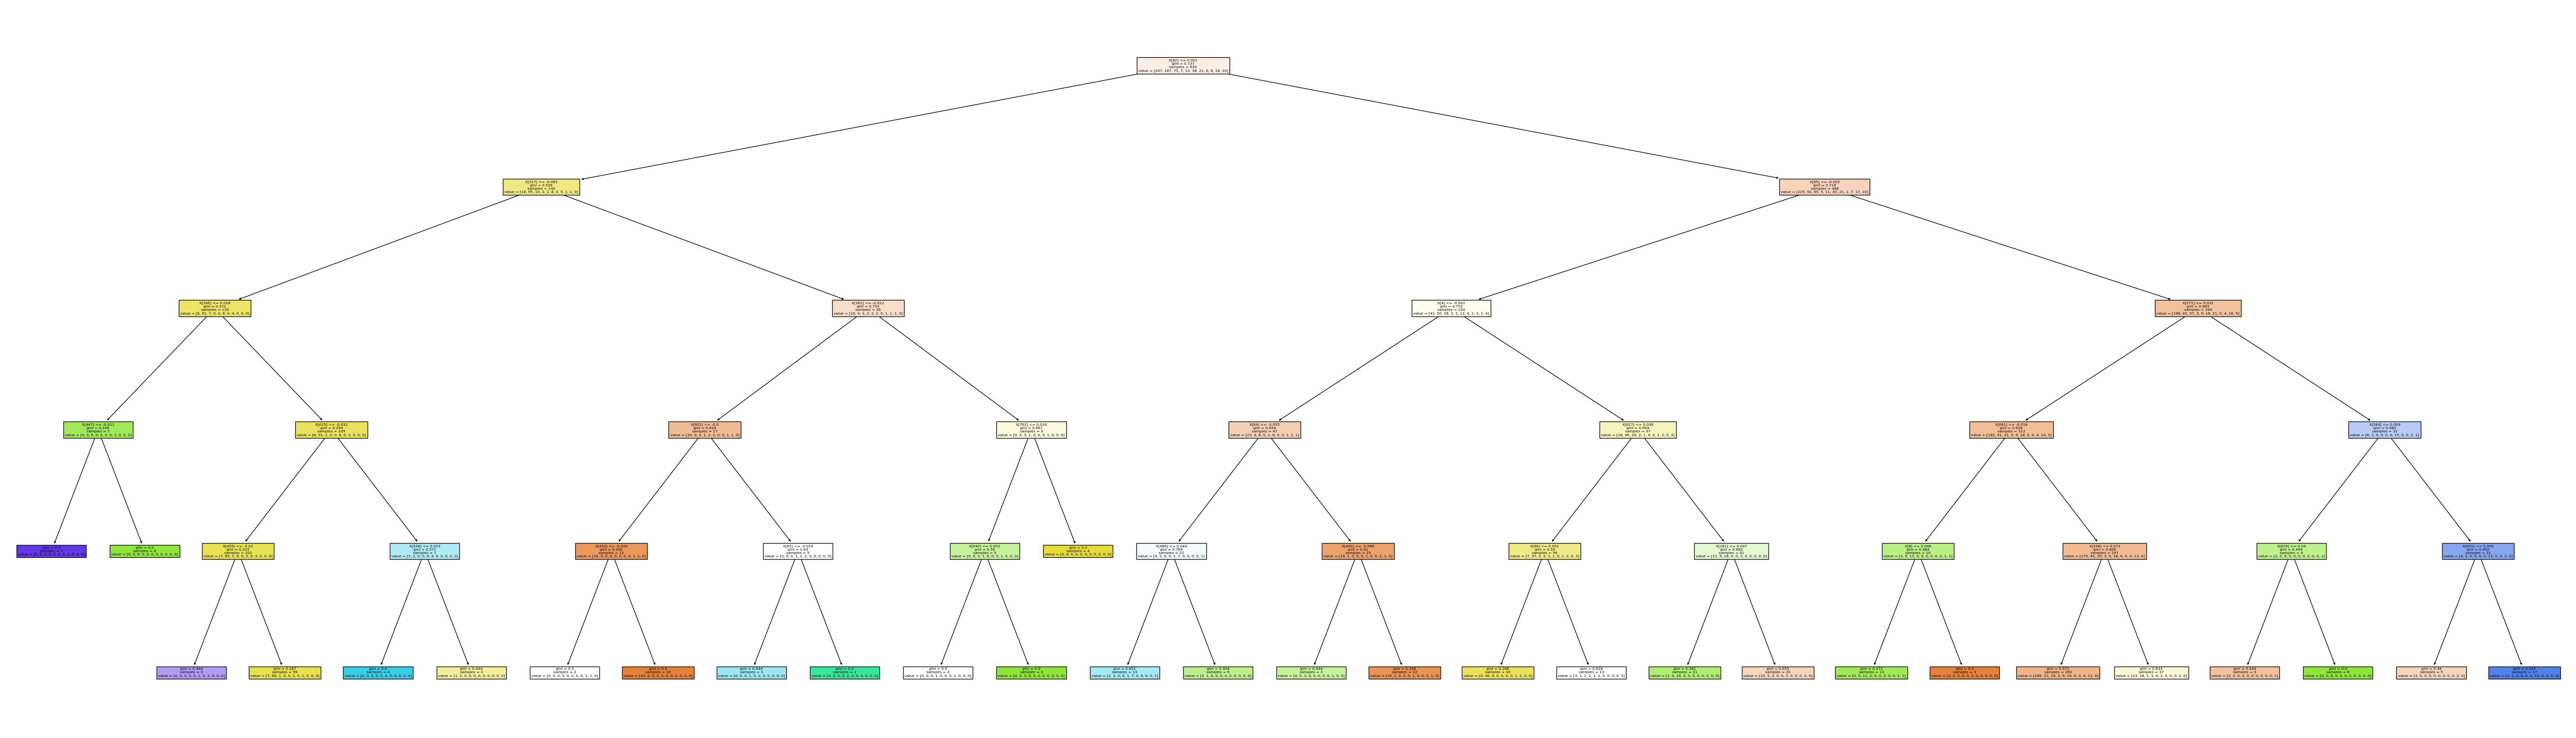

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X = df1.drop('Label', axis=1) 
y = df1['Label']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model2=DecisionTreeClassifier(max_depth=5)
model2=model2.fit(X_train, y_train)

test_pred = model2.predict(X_test)
accuracy1 = accuracy_score(y_test, test_pred)
print("Test Accuracy:", accuracy1)

train_pred = model2.predict(X_train)
accuracy2 = accuracy_score(y_train, train_pred)
print("Train Accuracy:", accuracy2)

plt.figure(figsize=(70,20))
plot_tree(model2,filled=True)
plt.show()

Test Accuracy: 0.4740740740740741
Train Accuracy: 0.9968253968253968


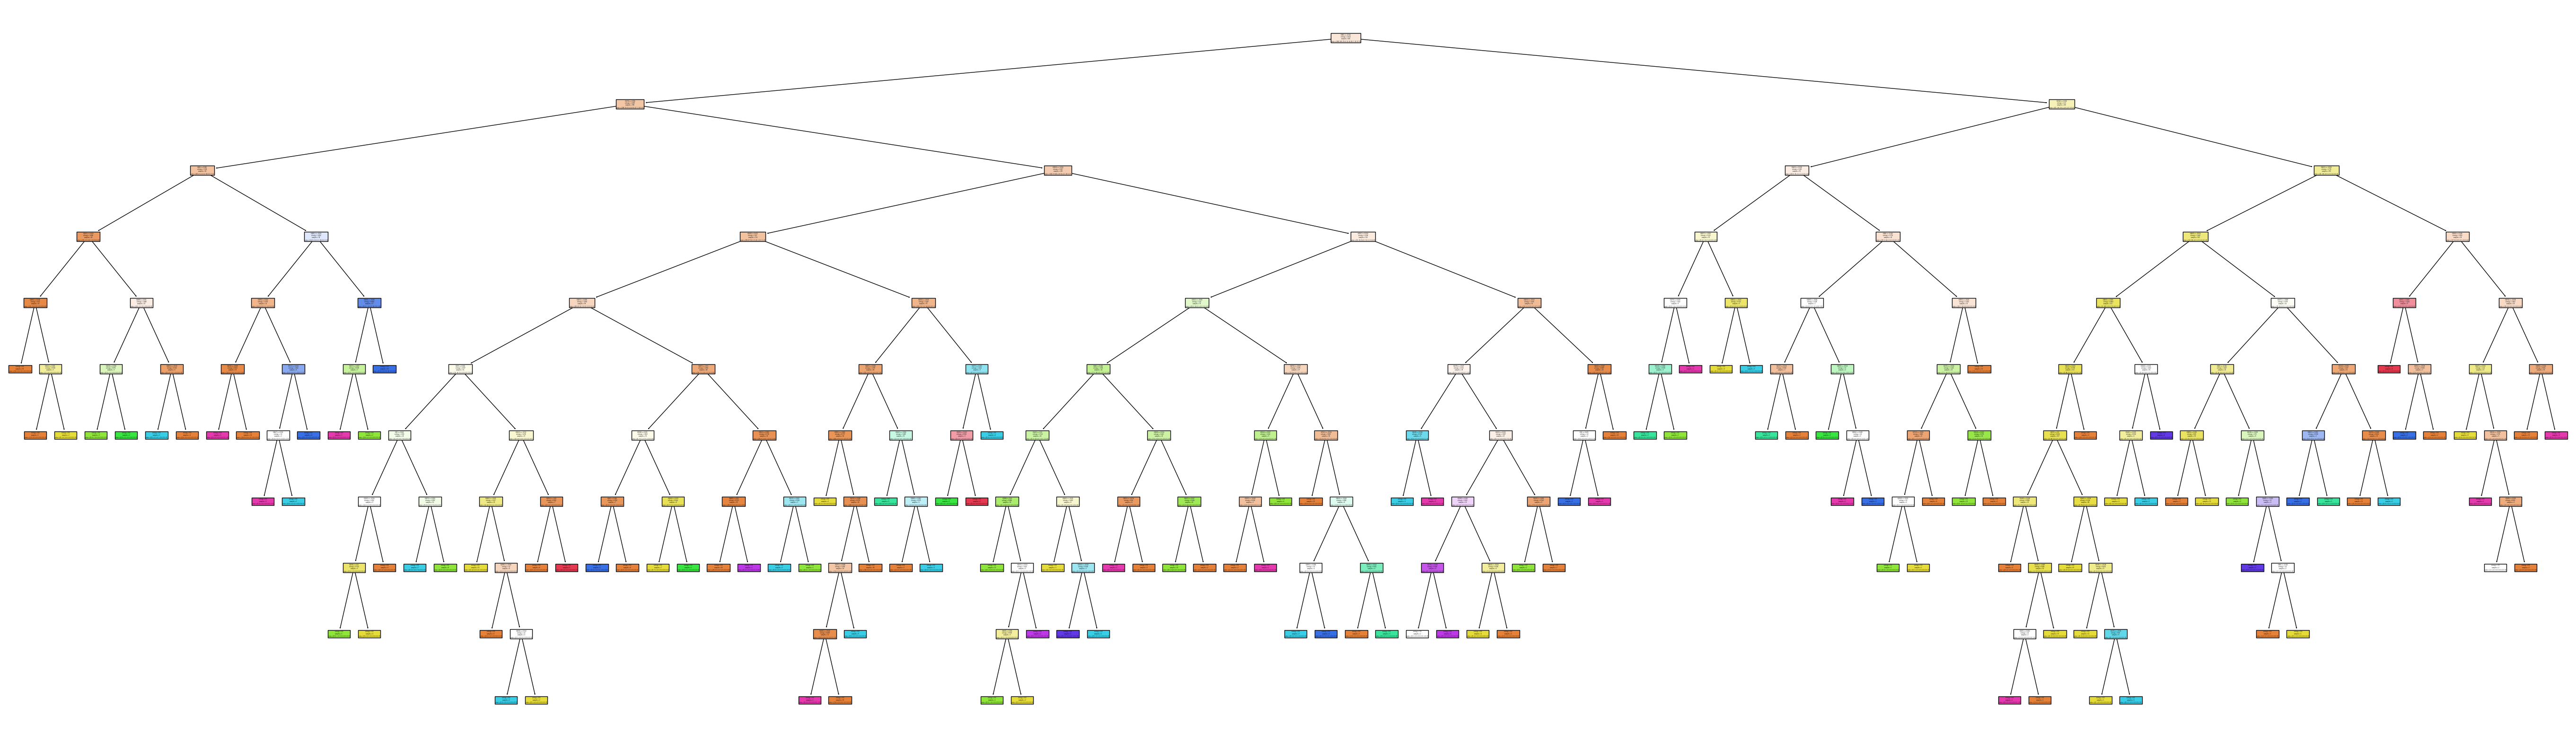

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X = df1.drop('Label', axis=1) 
y = df1['Label']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model3=DecisionTreeClassifier(criterion="entropy")
model3=model3.fit(X_train, y_train)

test_pred = model3.predict(X_test)
accuracy1 = accuracy_score(y_test, test_pred)
print("Test Accuracy:", accuracy1)

train_pred = model3.predict(X_train)
accuracy2 = accuracy_score(y_train, train_pred)
print("Train Accuracy:", accuracy2)

plt.figure(figsize=(70,20))
plot_tree(model3,filled=True)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df1.drop('Label', axis=1) 
y = df1['Label']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

test_pred = rf_model.predict(X_test)
accuracy1 = accuracy_score(y_test, test_pred)
print("Test Accuracy:", accuracy1)

train_pred = rf_model.predict(X_train)
accuracy2 = accuracy_score(y_train, train_pred)
print("Train Accuracy:", accuracy2)


Test Accuracy: 0.5814814814814815
Train Accuracy: 0.9984126984126984
